<a href="https://colab.research.google.com/github/shriram-pophale901/DMVPR/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
data = pd.read_csv("Wine (1).csv")

In [ ]:
print("Dataset preview:")
display(data.head())


Dataset preview:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
X = data.drop('Customer_Segment', axis=1)
y = data['Customer_Segment']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData after standardization:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Data after standardization:
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Wine_Class'] = y


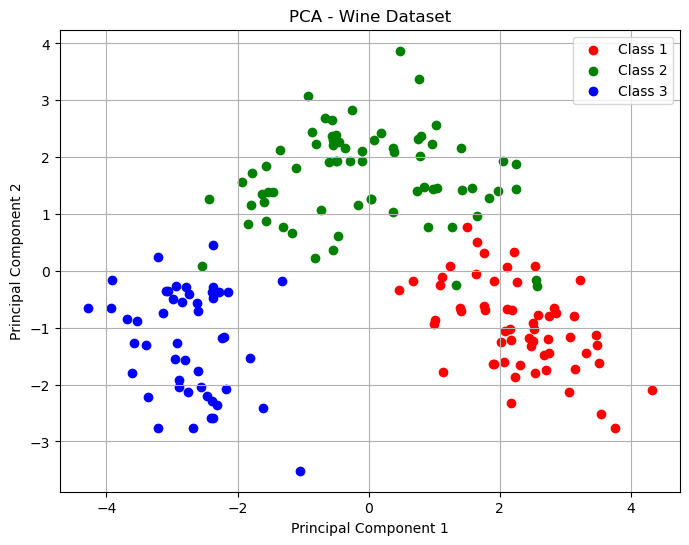

In [ ]:
plt.figure(figsize=(8,6))
for target, color in zip([1, 2, 3], ['red', 'green', 'blue']):
    subset = pca_df[pca_df['Wine_Class'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {target}', color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("\nExplained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)
print(f"\nTotal Variance Captured by 2 components: {sum(pca.explained_variance_ratio_)*100:.2f}%")



Explained variance ratio of each principal component:
[0.36198848 0.1920749 ]

Total Variance Captured by 2 components: 55.41%
